In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import funcoes
import itertools
from sklearn.metrics import accuracy_score
from sklearn import svm
import datetime as dt

sns.set_style('darkgrid')
%matplotlib inline

In [3]:
df = pd.read_csv('conhecimento.csv')

# Cenas para teste
# id_cenas = [
#     'LS82260702017256', # 226_070
#     'LS82210702017269', # 221_070
#     'LS82210672017285', # 221_067
#     'LS82210742018128', # 221_074
# ]

# Cena escolhida
id_cena = 'LS82210742018128'
col_sum = ['previsao', 'verdade', 'total', 'porcentagem', 'id_cena', 'caso']

<h4>Separa dado que será classificado</h4>
<pre>
Neste passo, estou guardando uma variável com o dado já classificado(<b>teste_original</b>) e outra com o mesmo dado sem classificação(<b>teste</b>). 
Isto é feito para no futuro comparar o acerto da classificação.
</pre>

<h4>Gráfico mostrando o conhecimento completo</h4>
<pre>
Neste gráfico tem todo o conhecimento antes de manipula-lo do pre-processamento para a classificação.
</pre>

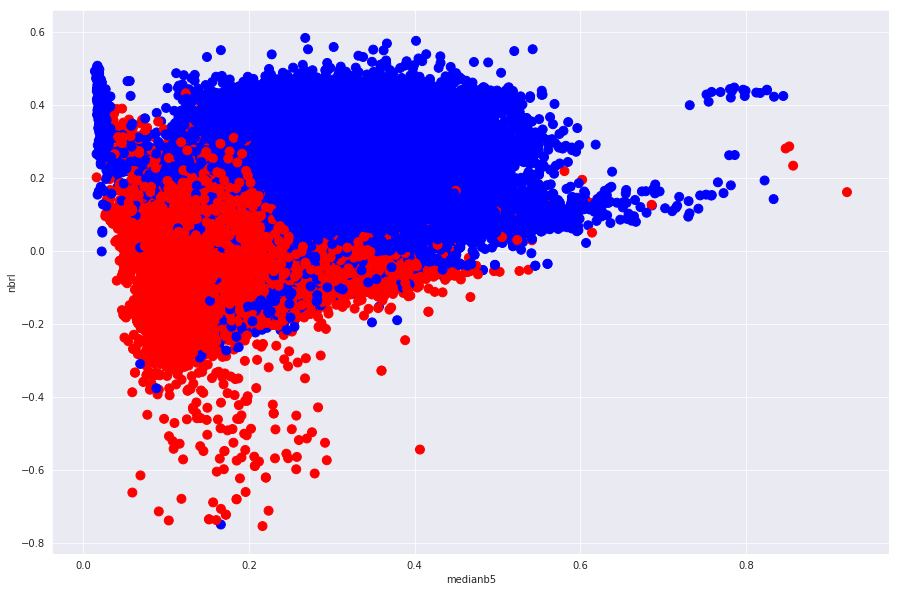

In [4]:
df['color'] = df.verifica.apply(lambda x: 'r' if x == 1 else 'b')
df.plot.scatter(x='medianb5',y='nbrl', figsize=(15, 10),s=80,c=df.color)

<h4>Quantidade de dados antes do pre-processamento</h4>
<pre>
Exibindo a quantidade por verifica.
</pre>

In [6]:
print(df.verifica.value_counts())
print(df.orb_pto.value_counts())

3    275367
1    113184
Name: verifica, dtype: int64
221_074    200773
221_067    100057
221_070     62542
226_070     25179
Name: orb_pto, dtype: int64


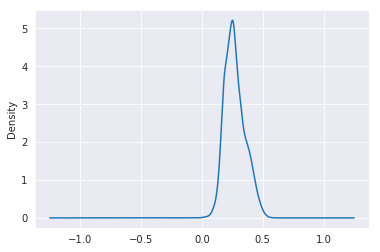

In [14]:
modelo.ndvi.plot.kde()

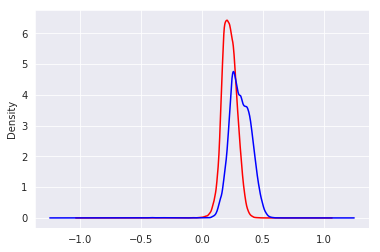

In [19]:
modelo[modelo.verifica==1].ndvi.plot.kde(c='r')
modelo[modelo.verifica==3].ndvi.plot.kde(c='b')

<h4>Separa dado que será classificado</h4>
<pre>
Neste passo, estou guardando uma variável com o dado já classificado(<b>teste_original</b>) e outra com o mesmo dado sem classificação(<b>teste</b>). 
Isto é feito para no futuro comparar o acerto da classificação.
</pre>

In [11]:
# Dado que será classificado
teste_original = df[df.id_cena==id_cena].copy().reset_index(drop=True)
teste = teste_original.copy()
teste['verifica'] = 0


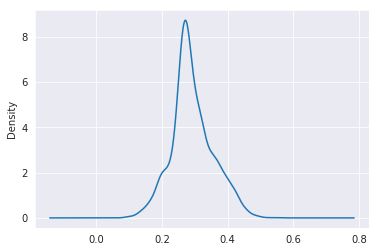

In [13]:
teste.ndvi.plot.kde()

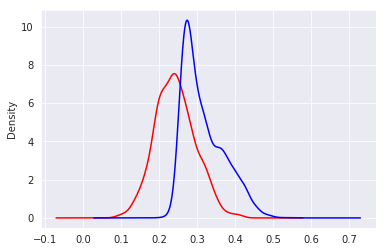

In [18]:
teste_original[teste_original.verifica==1].ndvi.plot.kde(c='r')
teste_original[teste_original.verifica==3].ndvi.plot.kde(c='b')

<h4>Escolhe modelo de conhecimento</h4>
<pre>
Neste passo, estou criando um DataFrame que tem verifica 1 e 3, ambos com a mesma quantidade. 
Este dado contém o conhecimentos de todas passagens, exceto da passagem classificada.
</pre>

In [12]:
modelo_inteiro = df[~(df.id_cena==id_cena)].copy()

modelo_inteiro_1 = modelo_inteiro[modelo_inteiro.verifica==1].copy()
modelo_inteiro_3_full = modelo_inteiro[modelo_inteiro.verifica==3].copy()

id3 = np.random.choice(modelo_inteiro_3_full.id, len(modelo_inteiro_1), replace=False) 
modelo_inteiro_3 = modelo_inteiro_3_full[modelo_inteiro_3_full.id.isin(id3)]

modelo = pd.concat([modelo_inteiro_1, modelo_inteiro_3]).reset_index(drop=True)

In [ ]:
teste_original = df[df.id_cena==id_cena].copy().reset_index(drop=True)
teste = teste_original.copy()
teste['verifica'] = 0

# Modelo
modelo_inteiro = df[~(df.id_cena==id_cena)].copy()

modelo_inteiro_1 = modelo_inteiro[modelo_inteiro.verifica==1].copy()
modelo_inteiro_3_full = modelo_inteiro[modelo_inteiro.verifica==3].copy()

id3 = np.random.choice(modelo_inteiro_3_full.id, len(modelo_inteiro_1), replace=False) 
modelo_inteiro_3 = modelo_inteiro_3_full[modelo_inteiro_3_full.id.isin(id3)]

modelo = pd.concat([modelo_inteiro_1, modelo_inteiro_3]).reset_index(drop=True)

return teste, teste_original, modelo

In [9]:
def gera_teste_modelo(id_cena):
    
    teste_original = df[df.id_cena==id_cena].copy().reset_index(drop=True)
    teste = teste_original.copy()
    teste['verifica'] = 0

    # Modelo
    modelo_inteiro = df[~(df.id_cena==id_cena)].copy()

    modelo_inteiro_1 = modelo_inteiro[modelo_inteiro.verifica==1].copy()
    modelo_inteiro_3_full = modelo_inteiro[modelo_inteiro.verifica==3].copy()

    id3 = np.random.choice(modelo_inteiro_3_full.id, len(modelo_inteiro_1), replace=False) 
    modelo_inteiro_3 = modelo_inteiro_3_full[modelo_inteiro_3_full.id.isin(id3)]

    modelo = pd.concat([modelo_inteiro_1, modelo_inteiro_3]).reset_index(drop=True)

    return teste, teste_original, modelo
def _resultado(teste, teste_original, pred, verdade,verifica=1):
    r = pd.merge(teste[['id', pred]], teste_original[['id', verdade]], on='id')
    r['v'] = r[pred].astype(str) + r[verdade].astype(str)
    
    try:
        x = len(r[(r[verdade]==verifica) & (r[pred] == verifica)])
        v = len(r[r[verdade]==verifica])
        p = int((x*100)/v)
    except:
        return [0, 0, 0]
    return [x, v, p]

In [10]:
def class_rf(dado, modelo, colunas):
    classificador = RandomForestClassifier(n_jobs=8, n_estimators=100, max_features=len(melhores_colunas), random_state=0, max_depth=3, min_samples_split=5)
    classificador.fit(modelo[colunas], modelo.verifica)
    return classificador.predict(dado[colunas])

def class_nn(dado, modelo, colunas):
    classificador = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.00010, max_iter=200)
    classificador.fit(modelo[colunas], modelo.verifica)
    return classificador.predict(dado[colunas])

def class_svm(dado, modelo, colunas):
    classificador = svm.SVC(kernel='rbf',C=1.0, gamma= 0.1)
#     classificador = svm.SVC(gamma='scale')
    classificador.fit(modelo[colunas], modelo.verifica)
    return classificador.predict(dado[colunas])

def class_knn(dado, colunas):
    dado = dado.copy()
    dados = dado[colunas].values
    classificador = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, n_jobs=8)
    classificador.fit(dados)
    r = classificador.predict(dados)
    
    dado['knn'] = r
#     dado['color'] = dado.knn.apply(lambda x: 'r' if x else 'b')
#     dado.plot.scatter(x='medianb5',y='nbrl', figsize=(15, 5),s=80,c=dado.color)
    c0 = dado[dado['knn']==0].medianb5.max()
    c1 = dado[dado['knn']==1].medianb5.max()
    melhor = 0
    if c1 < c0:
        melhor = 1
    return np.where(r==melhor, 1, 0)

def ver_resultado(teste, teste_original, nome_classe):
    y_pred = teste.sort_values('id').reset_index(drop=True)
    y_true = teste_original.sort_values('id').reset_index(drop=True)
    r = _resultado(y_pred, y_true, nome_classe, 'verifica')
    r.append(nome_classe)
    return r

In [11]:
melhores_colunas = ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3', 'medianb4', 'medianb5', 'medianb6', 'medianb7']

In [12]:
col_sum = ['previsao', 'verdade', 'porcentagem', 'id_cena', 'caso']
sumario = pd.DataFrame([], columns=col_sum)
for id_cena in id_cenas:
    teste, teste_original, modelo = gera_teste_modelo(id_cena)
    
    nome_classe = 'rf'
    teste[nome_classe] = class_rf(teste, modelo, melhores_colunas)
    resultado = ver_resultado(teste, teste_original, nome_classe)
    resultado.append(id_cena)
    print(resultado)
    teste[nome_classe] = teste[nome_classe].apply(lambda x: 1.5 if x == 1 else 0) # coloca peso 1.5
    sumario = sumario.append(dict(zip(col_sum, resultado)), ignore_index=True)
    
    
    nome_classe = 'nn'
    teste[nome_classe] = class_nn(teste, modelo, melhores_colunas)
    resultado = ver_resultado(teste, teste_original, nome_classe)
    resultado.append(id_cena)
    print(resultado)
    teste[nome_classe] = teste[nome_classe].apply(lambda x: 1.5 if x == 1 else 0) # coloca peso 1.5
    sumario = sumario.append(dict(zip(col_sum, resultado)), ignore_index=True)
    
    nome_classe = 'knn'
    teste[nome_classe] = class_knn(teste, melhores_colunas)
    resultado = ver_resultado(teste, teste_original, nome_classe)
    resultado.append(id_cena)
    print(resultado)
    teste[nome_classe] = teste[nome_classe].apply(lambda x: 1 if x == 1 else 0) # coloca peso 1
    sumario = sumario.append(dict(zip(col_sum, resultado)), ignore_index=True)
    
    nome_classe = 'svm'
    teste[nome_classe] = class_svm(teste, modelo, melhores_colunas)
    teste[nome_classe] = teste[nome_classe].apply(lambda x: 1 if x == 1 else 0) # coloca peso 1
    resultado = ver_resultado(teste, teste_original, nome_classe)
    resultado.append(id_cena)
    print(resultado)
    sumario = sumario.append(dict(zip(col_sum, resultado)), ignore_index=True)

    nome_classe = 'nota'
    teste['avaliacao'] = teste.rf + teste.nn + teste.knn + teste.svm
    teste[nome_classe] = teste.avaliacao.apply(lambda x: 1 if x > 2 else 3)
    resultado = ver_resultado(teste, teste_original, nome_classe)
    resultado.append(id_cena)
    print(resultado)
    sumario = sumario.append(dict(zip(col_sum, resultado)), ignore_index=True)

    break

[805, 805, 100, 'rf', 'LS82260702017256']
[801, 805, 99, 'nn', 'LS82260702017256']
[797, 805, 99, 'knn', 'LS82260702017256']
[805, 805, 100, 'svm', 'LS82260702017256']
[805, 805, 100, 'nota', 'LS82260702017256']


In [13]:
sumario

,previsao,verdade,porcentagem,id_cena,caso
0,805,805,100,rf,LS82260702017256
1,801,805,99,nn,LS82260702017256
2,797,805,99,knn,LS82260702017256
3,805,805,100,svm,LS82260702017256
4,805,805,100,nota,LS82260702017256


In [14]:
teste.head(2)

,ndvi,nbrl,dif_ndvi,dif_dnbrl,medianb2,medianb3,medianb4,medianb5,medianb6,medianb7,...,id,verifica,orb_pto,dia,rf,nn,knn,svm,avaliacao,nota
0,0.161971,-0.071473,0.232935,0.315308,0.109662,0.090275,0.091611,0.133856,0.18438,0.154984,...,5521903,0,226_070,256,1.5,1.5,1,1,5.0,1
1,0.273488,-0.027434,0.133419,0.184614,0.132233,0.122451,0.138019,0.239580,0.35275,0.253837,...,5522275,0,226_070,256,1.5,1.5,0,1,4.0,1
